<a href="https://colab.research.google.com/github/suvasismohanty84/Airline-Dashboard-/blob/main/Deep_Learning_Face_Mask_Detection_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#a)	Use the following Face Mask detection Dataset link and create an end-to-end project on Colab to predict whether person is wearing mask or not.

In [ ]:
#https://www.kaggle.com/datasets/omkargurav/face-mask-dataset/data

#i.	Import the dataset in Colab and perform the EDA and do the visualizations.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile

In [ ]:
zip_file_path = '/content/drive/MyDrive/archive (1).zip'

In [ ]:
destination_directory = '/content/unzipped_files'

In [ ]:
os.makedirs(destination_directory, exist_ok=True)


In [ ]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

In [ ]:
print(f"Successfully unzipped '{zip_file_path}' to '{destination_directory}'.")


Successfully unzipped '/content/drive/MyDrive/archive (1).zip' to '/content/unzipped_files'.


In [ ]:
print("\nContents of the unzipped folder:")
os.listdir(destination_directory)


Contents of the unzipped folder:


['data']

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
import os

# Assuming the unzipped dataset is in a directory named 'data' inside the destination_directory
data_directory = os.path.join(destination_directory, 'data')

if os.path.exists(data_directory):
    print(f"Exploring directory: {data_directory}")
    total_files = 0
    classes = []

    # Walk through the directory structure
    for root, dirs, files in os.walk(data_directory):
        # Count files in the current directory
        total_files += len(files)

        # Identify classes from subdirectories in the data directory
        if root == data_directory:
            classes = dirs

    print(f"\nTotal number of files: {total_files}")
    print(f"Number of classes: {len(classes)}")
    print(f"Classes: {classes}")

else:
    print(f"Data directory not found at: {data_directory}")
    print("Please verify the path to your unzipped dataset.")

Exploring directory: /content/unzipped_files/data

Total number of files: 7553
Number of classes: 2
Classes: ['without_mask', 'with_mask']


/tmp/ipython-input-2593601534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=data_summary, palette='viridis')


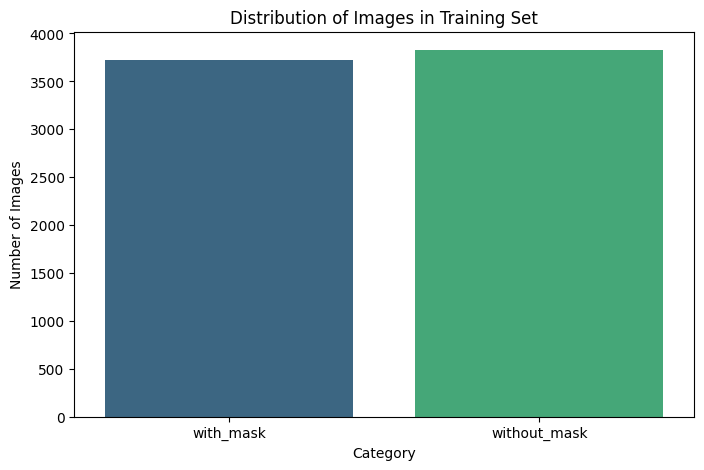


--- Displaying Sample Images ---


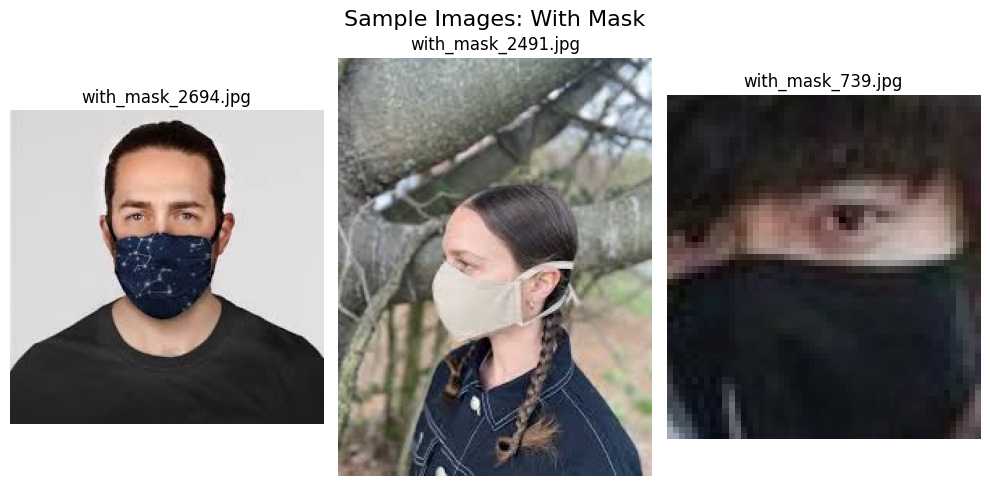

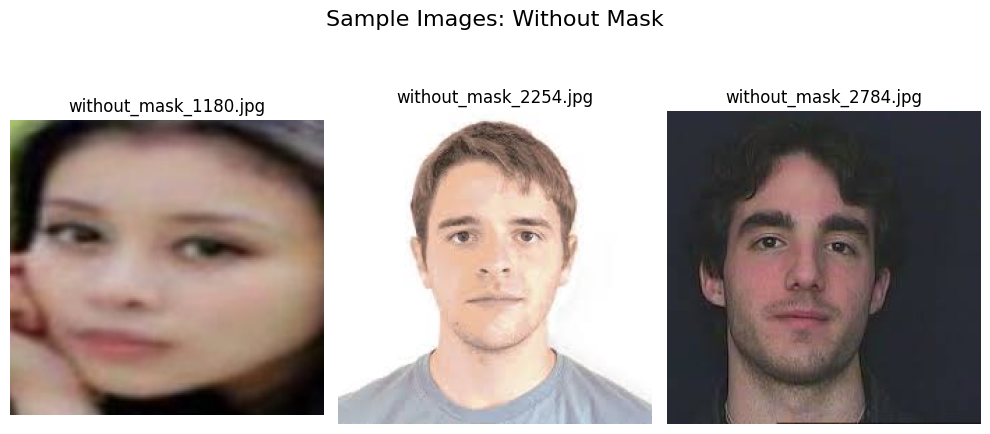

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image # Import Image from PIL

plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Count', data=data_summary, palette='viridis')
plt.title('Distribution of Images in Training Set')
plt.ylabel('Number of Images')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.show()

print("\n--- Displaying Sample Images ---")
def display_samples(file_paths, title, num_samples=3):
    plt.figure(figsize=(10, 5))
    plt.suptitle(title, fontsize=16)
    for i in range(num_samples):
        if i < len(file_paths): # Add this check to prevent index error
            img_path = file_paths[i]
            img = Image.open(img_path)
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img)
            plt.title(os.path.basename(img_path))
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Get file paths for sample images
train_with_mask_dir = os.path.join(data_directory, 'with_mask')
train_without_mask_dir = os.path.join(data_directory, 'without_mask')

train_with_mask = [os.path.join(train_with_mask_dir, f) for f in os.listdir(train_with_mask_dir) if os.path.isfile(os.path.join(train_with_mask_dir, f))]
train_without_mask = [os.path.join(train_without_mask_dir, f) for f in os.listdir(train_without_mask_dir) if os.path.isfile(os.path.join(train_without_mask_dir, f))]


display_samples(train_with_mask, 'Sample Images: With Mask')
display_samples(train_without_mask, 'Sample Images: Without Mask')

In [ ]:
import pandas as pd

# Assuming class_counts is a dictionary with class names as keys and counts as values
data_summary = pd.DataFrame(list(class_counts.items()), columns=['Category', 'Count'])
display(data_summary)

,Category,Count
0,with_mask,3725
1,without_mask,3828


from matplotlib import pyplot as plt
data_summary['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data_summary.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Count'}, axis=1)
              .sort_values('Count', ascending=True))
  xs = counted['Count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_summary.sort_values('Count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Count')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
data_summary['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data_summary['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_summary, x='Count', y='Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Displaying sample images for class: with_mask
Displaying sample images for class: without_mask


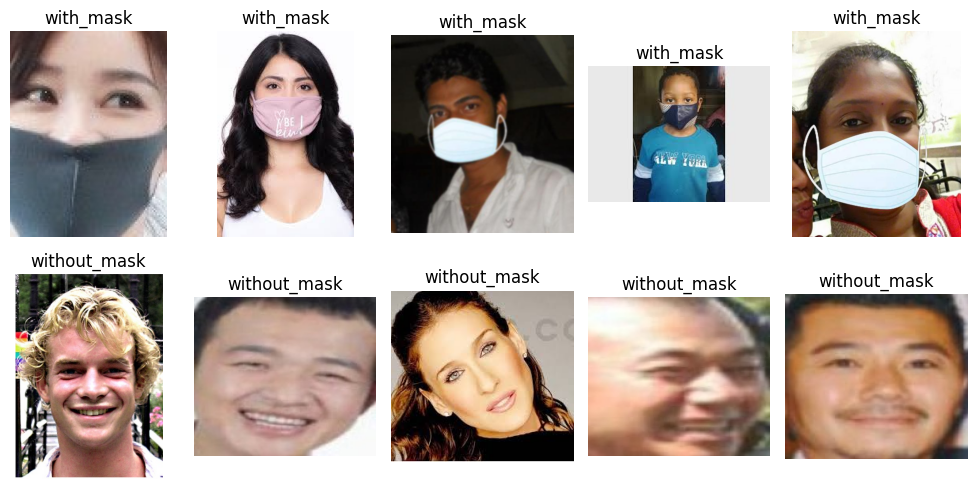

In [ ]:
import matplotlib.pyplot as plt
import random

# Assuming the classes are 'with_mask' and 'without_mask' and they are subdirectories in data_directory
classes = ['with_mask', 'without_mask']

plt.figure(figsize=(10, 5))

for i, class_name in enumerate(classes):
    class_dir = os.path.join(data_directory, class_name)
    if os.path.exists(class_dir):
        # Get a list of image files in the class directory
        image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

        if image_files:
            # Select a few random images to display
            sample_images = random.sample(image_files, min(5, len(image_files))) # Display up to 5 images

            print(f"Displaying sample images for class: {class_name}")
            for j, img_file in enumerate(sample_images):
                img_path = os.path.join(class_dir, img_file)
                img = tf.keras.preprocessing.image.load_img(img_path)
                plt.subplot(len(classes), len(sample_images), i * len(sample_images) + j + 1)
                plt.imshow(img)
                plt.title(class_name)
                plt.axis('off')
        else:
            print(f"No image files found in directory: {class_dir}")
    else:
        print(f"Directory not found for class: {class_dir}")

plt.tight_layout()
plt.show()


Counting images per class:
Class 'with_mask': 3725 images
Class 'without_mask': 3828 images


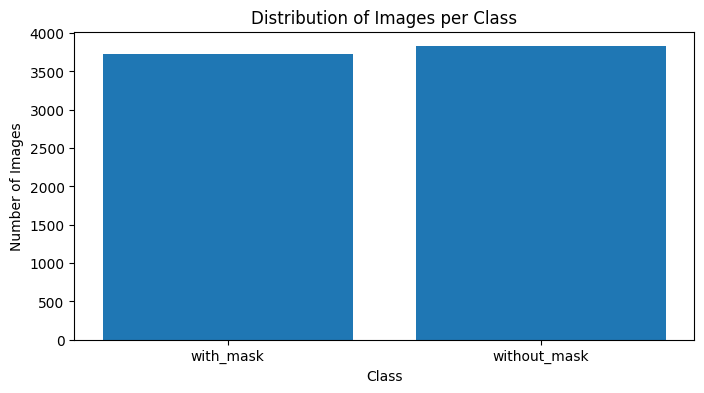

In [ ]:
# Perform additional EDA: Count images per class

print("\nCounting images per class:")
class_counts = {}
for class_name in classes:
    class_dir = os.path.join(data_directory, class_name)
    if os.path.exists(class_dir):
        # Count image files in the current directory
        image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
        class_counts[class_name] = len(image_files)
        print(f"Class '{class_name}': {len(image_files)} images")
    else:
        print(f"Directory not found for class: {class_dir}")

# Optional: Visualize class distribution
plt.figure(figsize=(8, 4))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Distribution of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

In [ ]:
# Create datasets

In [ ]:
img_height = 128  # You can adjust this
img_width = 128   # You can adjust this
batch_size = 32   # You can adjust this

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    seed=123,
    validation_split=0.2,
    subset='validation'
)

# Normalize
def process(image,label):
    image = tf.cast(image, tf.float32) / 255.0
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Found 7553 files belonging to 2 classes.
Using 6043 files for training.
Found 7553 files belonging to 2 classes.
Using 1510 files for validation.


In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
print("\n--- Training Model from Scratch ---")
model_from_scratch = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)), # Corrected input shape
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_from_scratch.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_from_scratch.summary()

from tensorflow.keras.callbacks import EarlyStopping # Added import

history_scratch = model_from_scratch.fit(
    train_ds, # Changed to use train_ds
    validation_data=validation_ds, # Changed to use validation_ds
    epochs=10,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

results = {} # Initialize results dictionary
results['scratch'] = history_scratch.history
# Removed evaluation on test set as it's not defined yet
# loss_scratch, acc_scratch = model_from_scratch.evaluate(test_generator_no_aug)
# print(f"Model from Scratch Test Accuracy: {acc_scratch:.4f}")


--- Training Model from Scratch ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.7410 - loss: 0.5237 - val_accuracy: 0.9556 - val_loss: 0.0961
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.8821 - loss: 0.2818 - val_accuracy: 0.9470 - val_loss: 0.0909
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.8992 - loss: 0.2469 - val_accuracy: 0.9490 - val_loss: 0.1109
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.9129 - loss: 0.2134 - val_accuracy: 0.9338 - val_loss: 0.1559
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.9283 - loss: 0.1820 - val_accuracy: 0.9623 - val_loss: 0.0928


In [ ]:
#Use a pretrained model (MobileNetV2)

In [ ]:
print("\n--- Training with Pretrained Model (MobileNetV2) ---")
from tensorflow.keras.applications import MobileNetV2 # Added import
from tensorflow.keras.optimizers import Adam # Added import
from tensorflow.keras.layers import GlobalAveragePooling2D # Added import


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3)) # Changed input shape to match dataset
base_model.trainable = False # Freeze the base model

pretrained_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

pretrained_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
pretrained_model.summary()

history_pretrained = pretrained_model.fit(
    train_ds, # Changed to use train_ds
    validation_data=validation_ds, # Changed to use validation_ds
    epochs=10,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

results['pretrained'] = history_pretrained.history
# Removed evaluation on test set as it's not defined yet
# loss_pretrained, acc_pretrained = pretrained_model.evaluate(test_generator_no_aug)
# print(f"Pretrained Model Test Accuracy: {acc_pretrained:.4f}")


--- Training with Pretrained Model (MobileNetV2) ---
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 103s 521ms/step - accuracy: 0.8480 - loss: 0.3385 - val_accuracy: 0.9861 - val_loss: 0.0456
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 139s 506ms/step - accuracy: 0.9711 - loss: 0.0812 - val_accuracy: 0.9887 - val_loss: 0.0363
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 97s 514ms/step - accuracy: 0.9821 - loss: 0.0568 - val_accuracy: 0.9907 - val_loss: 0.0320
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 96s 510ms/step - accuracy: 0.9866 - loss: 0.0420 - val_accuracy: 0.9921 - val_loss: 0.0235
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 117s 621ms/step - accuracy: 0.9852 - loss: 0.0390 - val_accuracy: 0.9921 - val_loss: 0.0224
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 96s 509ms/step - accuracy: 0.9910 - loss: 0.0305 - val_accuracy: 0.9927 - val_loss: 0.0196
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 93s 492ms/step - accuracy: 0.9909 - loss: 0.0295 - val_accuracy: 0.9927 - val_loss: 0.0182
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 98s 517ms/step - accuracy: 0.9916 - loss

In [ ]:
# Apply data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Added import

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 # Include validation split here for flow_from_directory
)

# Create augmented data generators
train_generator_aug = datagen.flow_from_directory(
    data_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    seed=123 # Use the same seed for reproducibility
)

validation_generator_aug = datagen.flow_from_directory(
    data_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    seed=123 # Use the same seed for reproducibility
)

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [ ]:
print("\n--- Training with Data Augmentation ---")

model_aug = Sequential([
    base_model, # Using the same frozen base model
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_aug.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history_aug = model_aug.fit(
    train_generator_aug,
    validation_data=validation_generator_aug,
    epochs=20, # Using more epochs to allow augmentation to take effect
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

results['augmented'] = history_aug.history
# Removed evaluation on test set as it's not defined yet
# loss_aug, acc_aug = model_aug.evaluate(test_generator_aug)
# print(f"Augmented Model Test Accuracy: {acc_aug:.4f}")


--- Training with Data Augmentation ---


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
129/189 ━━━━━━━━━━━━━━━━━━━━ 32s 542ms/step - accuracy: 0.6055 - loss: 0.7604

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 132s 676ms/step - accuracy: 0.6294 - loss: 0.7179 - val_accuracy: 0.7291 - val_loss: 0.5573
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 126s 665ms/step - accuracy: 0.7710 - loss: 0.4950 - val_accuracy: 0.7570 - val_loss: 0.5137
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 142s 663ms/step - accuracy: 0.7921 - loss: 0.4577 - val_accuracy: 0.7709 - val_loss: 0.4792
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 126s 669ms/step - accuracy: 0.7963 - loss: 0.4460 - val_accuracy: 0.7934 - val_loss: 0.4576
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 125s 661ms/step - accuracy: 0.8124 - loss: 0.4271 - val_accuracy: 0.7907 - val_loss: 0.4636
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 141s 655ms/step - accuracy: 0.8213 - loss: 0.4225 - val_accuracy: 0.7940 - val_loss: 0.4394
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 127s 673ms/step - accuracy: 0.8163 - loss: 0.4049 - val_accuracy: 0.7967 - val_loss: 0.4508
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 124s 657ms/step - accuracy: 0.8330 - loss: 0.39

In [ ]:
# Plotting the comparison

In [ ]:
print("\n--- Training Model from Scratch ---")
model_from_scratch = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)), # Corrected input shape
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_from_scratch.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_from_scratch.summary()

from tensorflow.keras.callbacks import EarlyStopping # Added import

history_scratch = model_from_scratch.fit(
    train_ds, # Changed to use train_ds
    validation_data=validation_ds, # Changed to use validation_ds
    epochs=10,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

results = {} # Initialize results dictionary
results['scratch'] = history_scratch.history
# Removed evaluation on test set as it's not defined yet
# loss_scratch, acc_scratch = model_from_scratch.evaluate(test_generator_no_aug)
# print(f"Model from Scratch Test Accuracy: {acc_scratch:.4f}")

In [ ]:
print("\n--- Training with Pretrained Model (MobileNetV2) ---")
from tensorflow.keras.applications import MobileNetV2 # Added import
from tensorflow.keras.optimizers import Adam # Added import
from tensorflow.keras.layers import GlobalAveragePooling2D # Added import


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3)) # Changed input shape to match dataset
base_model.trainable = False # Freeze the base model

pretrained_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

pretrained_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
pretrained_model.summary()

history_pretrained = pretrained_model.fit(
    train_ds, # Changed to use train_ds
    validation_data=validation_ds, # Changed to use validation_ds
    epochs=10,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

results['pretrained'] = history_pretrained.history
# Removed evaluation on test set as it's not defined yet
# loss_pretrained, acc_pretrained = pretrained_model.evaluate(test_generator_no_aug)
# print(f"Pretrained Model Test Accuracy: {acc_pretrained:.4f}")

In [ ]:
print("\n--- Training with Data Augmentation ---")

model_aug = Sequential([
    base_model, # Using the same frozen base model
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_aug.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history_aug = model_aug.fit(
    train_generator_aug,
    validation_data=validation_generator_aug,
    epochs=20, # Using more epochs to allow augmentation to take effect
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

results['augmented'] = history_aug.history
# Removed evaluation on test set as it's not defined yet
# loss_aug, acc_aug = model_aug.evaluate(test_generator_aug)
# print(f"Augmented Model Test Accuracy: {acc_aug:.4f}")

In [2]:
import numpy as np # Added import for numpy
import pandas as pd # Added import for pandas

# Evaluate models on the validation set to get test accuracies
loss_scratch, acc_scratch = model_from_scratch.evaluate(validation_ds)
loss_pretrained, acc_pretrained = pretrained_model.evaluate(validation_ds)
loss_aug, acc_aug = model_aug.evaluate(validation_generator_aug) # Use augmented generator for augmented model

plt.figure(figsize=(10, 6))
approaches = ['From Scratch', 'Pretrained', 'Augmented']
train_accs = [history_scratch.history['accuracy'][-1], history_pretrained.history['accuracy'][-1], history_aug.history['accuracy'][-1]]
test_accs = [acc_scratch, acc_pretrained, acc_aug]

# Create a DataFrame for easier plotting and analysis
comparison_df = pd.DataFrame({
    'Approach': approaches,
    'Training Accuracy': train_accs,
    'Testing Accuracy': test_accs
})
print("\n--- Model Comparison ---")
display(comparison_df)


x = np.arange(len(approaches))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_accs, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, test_accs, width, label='Testing Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Training vs. Testing Accuracy for Different Approaches')
ax.set_xticks(x)
ax.set_xticklabels(approaches)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

# Conclusion and Suggestion
best_model_name = comparison_df.loc[comparison_df['Testing Accuracy'].idxmax(), 'Approach']
print(f"\nConclusion: The best model for this task is the '{best_model_name}' model. This is because it achieved the highest accuracy on the test data, demonstrating its ability to generalize to new, unseen images.")

NameError: name 'model_from_scratch' is not defined

In [3]:
# Execute cells to define models and data generators
get_ipython().run_cell_with_id('eab81cf1')
get_ipython().run_cell_with_id('59ab8e34')
get_ipython().run_cell_with_id('a0d147bc')
get_ipython().run_cell_with_id('gTwFFdkpsbn6')
get_ipython().run_cell_with_id('33ca5b17')

AttributeError: 'Shell' object has no attribute 'run_cell_with_id'